<a href="https://colab.research.google.com/github/Kac1509/ZebrafishClassifier/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import os

#Set if running locally or in Google Colaboratory
Colab = False
if Colab:
    Script_path = '/content/gdrive/My Drive/Colab Notebooks/Classifier/scripts'
    Base_path = '/content/gdrive/My Drive/Colab Notebooks/Classifier/'
    from google.colab import drive
    drive.mount('/content/gdrive')
else:
    Script_path = os.getcwd() + '/Classifier/scripts'
    Base_path = 'Classifier/'

#Add script folder to system path
sys.path.insert(0, Script_path)
print(sys.path)

['C:\\Users\\Kaleem\\EPFL\\Fall 2018\\Machine Learning\\Project_2\\Git\\ZebrafishClassifier/Classifier/scripts', '', 'C:\\Users\\Kaleem\\Anaconda3\\python36.zip', 'C:\\Users\\Kaleem\\Anaconda3\\DLLs', 'C:\\Users\\Kaleem\\Anaconda3\\lib', 'C:\\Users\\Kaleem\\Anaconda3', 'C:\\Users\\Kaleem\\AppData\\Roaming\\Python\\Python36\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.6-py3.6.egg', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Kaleem\\AppData\\Roaming\\SPB_Data\\.ipython']


In [3]:
%load_ext autoreload
%autoreload 2

from build_model_RMSprop import *
from create_data_generators import *
from createFolders import *
from createSets import *
from GenotypeClass import *
from load_pre_trained_VGG16 import *
from load_pre_trained_Inception import *
from model_prediction import *
from plot_loss_acc import *
from predictClass import *
from saveFiles import *
from unzip_data import *

C:\Users\Kaleem\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
#Name of the data zipfile
Data_file = 'DataStraightened.zip'

#Set Paths
Zip_path = Base_path + Data_file
Extracted_path = Base_path + 'ExtractedData/'
Partitioned_path = Base_path + 'PartitionedData/'
Prediction_path = Base_path + 'Predictions/'
Validation_prediction_path = Base_path + 'Validation_Predictions/'


In [5]:
#Specify input parameters for the pre_trained model
shapeY = 50
shapeX = 50
color_channels = 3

# Loading pre-trained models

#VGG16 Model
local_weights_file_VGG16 = Base_path + 'weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model_VGG16, last_layer_output_VGG16 = load_pre_trained_VGG16(local_weights_file_VGG16, shapeY, shapeX, color_channels)

# Inception Model
#local_weights_file_Inception = Base_path + 'weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
#pre_trained_model_Inception, last_layer_output_Inception = load_pre_trained_Inception(local_weights_file_Inception, shapeY, shapeX, color_channels)


In [6]:
#Clear Folders and create Prediction folder
deleteFiles(Extracted_path)
deleteFiles(Partitioned_path)
createFolder(Prediction_path)


In [7]:
#Extract Data
unzip_data(Zip_path, Extracted_path)

In [8]:

Genotypes = []
num_classes = len(glob.glob(Extracted_path+'*'))
for i in range(num_classes):
        #Retrieve directory for a given type
        Genotype_name = os.listdir(Extracted_path)[i]
        Genotypes.append(Genotype(Genotype_name))
print(num_classes)
createDirectories(num_classes,Extracted_path,Partitioned_path,Genotypes)


3


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1359x150 at 0x1E7B08B5358>


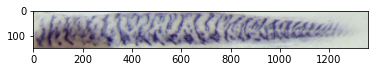

In [9]:
#Sample Image 
print(Genotypes[1].images[0])
plt.imshow(Genotypes[1].images[0])

In [10]:
#Partition data into training and test set
#If fixed set to true, all training and test sets have the same size for all classes 
createTrain_Test(Genotypes,0.5, fixed = True)

31
76
33


In [11]:
#Save partitions to respective folders
saveFiles(Genotypes)

In [14]:
# Creating training and validation data generators from separated data
# Transformations are for training generator only

train_generator, validation_generator = create_data_generators(
    Partitioned_path,
    shapeY, shapeX, 
    train_batch_size=12, 
    validation_batch_size=15,
    class_mode='categorical')#,
    #rotation_range=30,
    #width_shift_range=0.3,
    #height_shift_range=0.3,
    #shear_range=0.3,
    #zoom_range=0.3)

Found 48 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [15]:
# Building model
learning_rate = 0.00001
hidden_units_num = 1024
model = build_model_RMSprop(pre_trained_model_VGG16, last_layer_output_VGG16, 
                            learning_rate = learning_rate , hidden_units_num = hidden_units_num,num_classes=num_classes,activation = 'softmax')

In [16]:
# Training model

history = model.fit_generator(
      train_generator,
      steps_per_epoch=4,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=2)

Epoch 1/5
 - 4s - loss: 0.6739 - acc: 0.6944 - val_loss: 0.6556 - val_acc: 0.7481
Epoch 2/5
 - 3s - loss: 0.6555 - acc: 0.7222 - val_loss: 0.6431 - val_acc: 0.7481
Epoch 3/5
 - 3s - loss: 0.6444 - acc: 0.7222 - val_loss: 0.6335 - val_acc: 0.7481
Epoch 4/5
 - 3s - loss: 0.6348 - acc: 0.7222 - val_loss: 0.6251 - val_acc: 0.7185
Epoch 5/5
 - 3s - loss: 0.6259 - acc: 0.7222 - val_loss: 0.6174 - val_acc: 0.7185


In [17]:
#Predict Model based on validation set

model_prediction(
    model, 
    Genotypes,
    Validation_prediction_path,
    shapeY, shapeX, 
    class_mode = 'categorical' # If the content of class0_test_path and class1_test_path should be refreshed
    )

Found 15 images belonging to 1 classes.
15/15 [==============================] - 1s 65ms/step
fsstbx6s
[[0.37412265 0.44277146 0.1831059 ]
 [0.40359718 0.3906113  0.20579156]
 [0.36858195 0.42904645 0.2023716 ]
 [0.38742572 0.42067134 0.19190292]
 [0.39858064 0.41058597 0.19083342]
 [0.4012209  0.41704142 0.18173763]
 [0.41820902 0.4084472  0.17334372]
 [0.4030103  0.39863342 0.19835624]
 [0.39319885 0.41923478 0.18756637]
 [0.41322955 0.38626504 0.20050538]
 [0.4163757  0.39491302 0.18871129]
 [0.45113826 0.36348408 0.18537772]
 [0.39642566 0.43662104 0.1669533 ]
 [0.3900104  0.40230322 0.20768635]
 [0.3974984  0.40884373 0.19365785]]
Found 15 images belonging to 1 classes.
15/15 [==============================] - 1s 59ms/step
her1her7s
[[0.5388233  0.28656864 0.17460802]
 [0.40156743 0.39897975 0.19945279]
 [0.43909138 0.3876663  0.17324232]
 [0.44655097 0.35864332 0.19480577]
 [0.4033545  0.4089787  0.18766677]
 [0.39785695 0.36647415 0.23566888]
 [0.38445014 0.4087994  0.2067505 ]


In [21]:
#Predict Model based on Images placed in Prediction Folder
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

predictionFiles, predictions = predictClass(model,Prediction_path, shapeY, shapeX, class_mode='categorical')
#print(predictions)
for i in range(len(predictions)):
    print(predictionFiles.filenames[i])
    print(predictions[i])

Found 15 images belonging to 1 classes.
15/15 [==============================] - 1s 55ms/step
her1her7s\test\Validation1.png
[0.3956 0.4293 0.1751]
her1her7s\test\Validation10.png
[0.3845 0.4088 0.2068]
her1her7s\test\Validation11.png
[0.4020 0.3860 0.2121]
her1her7s\test\Validation12.png
[0.4750 0.3460 0.1789]
her1her7s\test\Validation13.png
[0.4064 0.3880 0.2055]
her1her7s\test\Validation14.png
[0.3869 0.4286 0.1845]
her1her7s\test\Validation15.png
[0.4034 0.4090 0.1877]
her1her7s\test\Validation2.png
[0.4391 0.3877 0.1732]
her1her7s\test\Validation3.png
[0.3979 0.3665 0.2357]
her1her7s\test\Validation4.png
[0.4447 0.3559 0.1995]
her1her7s\test\Validation5.png
[0.4083 0.3983 0.1933]
her1her7s\test\Validation6.png
[0.4466 0.3586 0.1948]
her1her7s\test\Validation7.png
[0.4429 0.3459 0.2112]
her1her7s\test\Validation8.png
[0.5388 0.2866 0.1746]
her1her7s\test\Validation9.png
[0.4016 0.3990 0.1995]


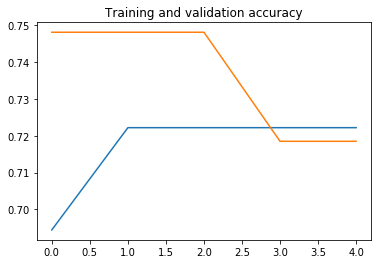

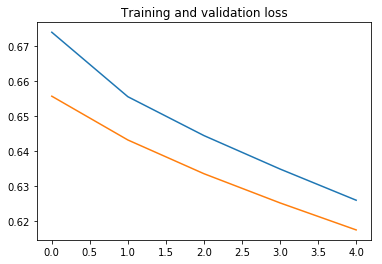

In [22]:
#Plot training and validation accuracy per epoch

plot_loss_acc(history)

In [24]:

for i in range(len(predictions)):
    #print("{0:.2f}".predictions[i][0])
    print(format(predictions[i][0], '.2f'))

0.40
0.38
0.40
0.48
0.41
0.39
0.40
0.44
0.40
0.44
0.41
0.45
0.44
0.54
0.40


In [26]:
import csv
PredictionCSV = 'Prediction_Model_1.csv'
with open(PredictionCSV, 'w') as csvfile:
    fieldnames = ['Filename', 'WT', 'FSS', 'HH']
    writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames,lineterminator = '\n')
    writer.writeheader()
    for i in range(len(predictions)):
        writer.writerow({'Filename':str(predictionFiles.filenames[i]),'WT':float(format(predictions[i][0], '.4f')),'FSS':float(format(predictions[i][1], '.4f')),'HH':float(format(predictions[i][2], '.4f'))})
    Model_parameters = model.optimizer,", Learning Rate:", learning_rate, ", Hidden_Units:", hidden_units_num, "Input_size:", model.inputs
    writer.writerow({'Filename':"Model",'WT':str(Model_parameters)})
    